In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from amstools import *

In [3]:
from tensorpotential.calculator import grace_fm, TPCalculator

[tensorpotential] Info: Environment variable TF_USE_LEGACY_KERAS is automatically set to '1'.


2026-02-25 19:52:03.508294: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1772045523.525807 2927760 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1772045523.531136 2927760 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1772045523.544036 2927760 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772045523.544046 2927760 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772045523.544048 2927760 computation_placer.cc:177] computation placer alr

In [4]:
calc=TPCalculator("seed/1/final_model/")

2026-02-25 19:52:10.025255: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2026-02-25 19:52:10.025280: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2026-02-25 19:52:10.025284: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: n2dgx01
2026-02-25 19:52:10.025287: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] hostname: n2dgx01
2026-02-25 19:52:10.025353: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:197] libcuda reported version is: 575.51.3
2026-02-25 19:52:10.025366: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:201] kernel reported versi

In [5]:
from amstools.thermodynamics import run_convex_hull_calculation, plot_convex_hull

In [6]:
from amstools.sources import fetch_structures, fetch_mp_reference_df

In [7]:
from ase.build import bulk

In [8]:
import os

In [14]:
cache_dir=os.path.abspath(os.getcwd()+"/../0-data/AlLi_Materials_Project")
cache_dir

'/pc2/users/u/usrtr200/mlpfits-2026-grace/grace-tutorial-2026/1-AlLi-GRACE-2LAYER/0-data/AlLi_Materials_Project'

In [15]:
ref_df=fetch_mp_reference_df(['Al','Li'], 
                             # mp_api_key='XXXXX',  ## get from https://next-gen.materialsproject.org/api                         
                             max_atoms=32,
                             cache_dir=cache_dir)

In [16]:
ref_df

,name,ase_atoms,e_per_atom,e_formation_per_atom,e_chull_dist_per_atom
0,Al__mp-134,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",NaN,0.000000,0.000000
1,Al__mp-2647008,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",NaN,0.032078,0.032078
2,Al__mp-1183144,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",NaN,0.010481,0.010481
3,Li__mp-51,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.001672,0.001672
4,Li__mp-135,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.009651,0.009651
5,Li__mp-976411,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.005889,0.005889
6,Li__mp-1018134,"(Atom('Li', [np.float64(4.618009551014942), np...",NaN,0.000000,0.000000
7,Li__mp-1103107,"(Atom('Li', [np.float64(1.379696372079909), np...",NaN,0.055379,0.055379
8,Li__mp-1063005,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.015671,0.015671
9,Li__mp-10173,"(Atom('Li', [np.float64(-1.1807313597921131e-0...",NaN,0.005988,0.005988


In [17]:
struct_dict=fetch_structures(['Al','Li'], 
                             #mp_api_key='XXX', 
                             max_atoms=32,
                             cache_dir=cache_dir)

In [19]:
pipeline_dict={}

In [20]:
df, pipeline_dict=run_convex_hull_calculation(structure_dict=struct_dict, calc=calc, pipeline_dict=pipeline_dict)

2026-02-25 19:57:12,099 - root - INFO - Processing structure 'Al__mp-134'
2026-02-25 19:57:12,100 - root - INFO - =======================
2026-02-25 19:57:12,100 - root - INFO - Step: optimization
Processing: optimized_structure (1 atom(s)):   0%|          | 0/1 [00:00<?, ?it/s]WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
I0000 00:00:1772045832.670349 2927760 service.cc:152] XLA service 0x1829cc60 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1772045832.670399 2927760 service.cc:160]   StreamExecutor device (0): Host, Default Version
2026-02-25 19:57:12.966776: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1772045835.047031 2927760 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
Processing: optimized_s

Structure dataset: multiple unique compositions found, trying to construct convex hull


In [21]:
df

,name,ase_atoms,energy,energy_per_atom,equilibrium_volume,equilibrium_bulk_modulus,comp_dict,NUMBER_OF_ATOMS,comp_tuple,n_Al,c_Al,n_Li,c_Li,e_formation_per_atom,e_chull_dist_per_atom
0,Al__mp-134,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",-3.754286,-3.754286,16.550793,79.358409,{'Al': 1},1,"((Al, 1.0),)",1,1.000000,0,0.000000,0.000000,0.000000
1,Al__mp-2647008,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",-7.441067,-3.720533,33.237208,72.117059,{'Al': 2},2,"((Al, 1.0),)",2,1.000000,0,0.000000,0.033752,0.033752
2,Al__mp-1183144,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",-14.944692,-3.736173,66.173810,74.345576,{'Al': 4},4,"((Al, 1.0),)",4,1.000000,0,0.000000,0.018113,0.018113
3,Li__mp-51,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",-1.915214,-1.915214,20.140467,15.916072,{'Li': 1},1,"((Li, 1.0),)",0,0.000000,1,1.000000,0.000000,0.000000
4,Li__mp-135,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",-1.914206,-1.914206,20.188884,12.823116,{'Li': 1},1,"((Li, 1.0),)",0,0.000000,1,1.000000,0.001008,0.001008
5,Li__mp-976411,"(Atom('Li', [np.float64(1.9589993347710246e-21...",-7.657000,-1.914250,80.394917,15.844863,{'Li': 4},4,"((Li, 1.0),)",0,0.000000,4,1.000000,0.000964,0.000964
6,Li__mp-1018134,"(Atom('Li', [np.float64(4.580135972373657), np...",-5.741669,-1.913890,60.242675,15.568911,{'Li': 3},3,"((Li, 1.0),)",0,0.000000,3,1.000000,0.001324,0.001324
7,Li__mp-1103107,"(Atom('Li', [np.float64(1.6701325231835016), n...",-22.579716,-1.881643,244.794676,13.430195,{'Li': 12},12,"((Li, 1.0),)",0,0.000000,12,1.000000,0.033571,0.033571
8,Li__mp-1063005,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",-5.710276,-1.903425,59.361532,15.298910,{'Li': 3},3,"((Li, 1.0),)",0,0.000000,3,1.000000,0.011789,0.011789
9,Li__mp-10173,"(Atom('Li', [np.float64(-1.0202347443557916e-0...",-3.826824,-1.913412,40.090714,15.707191,{'Li': 2},2,"((Li, 1.0),)",0,0.000000,2,1.000000,0.001802,0.001802


In [22]:
calc_fm=grace_fm("GRACE-2L-OMAT-large-ft-E")

Using cached GRACE model from /pc2/users/u/usrtr200/.cache/grace/GRACE-2L-OMAT-large-ft-E
Model license: Academic Software License


In [23]:
pipeline_dict_fm = {}

In [24]:
df_fm, pipeline_dict_fm=run_convex_hull_calculation(structure_dict=struct_dict, calc=calc_fm, pipeline_dict=pipeline_dict_fm)

2026-02-25 19:58:07,488 - root - INFO - Processing structure 'Al__mp-134'
2026-02-25 19:58:07,488 - root - INFO - =======================
2026-02-25 19:58:07,489 - root - INFO - Step: optimization
Processing: optimized_structure (1 atom(s)): 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
2026-02-25 19:58:10,510 - root - INFO - Step status: finished
2026-02-25 19:58:10,510 - root - INFO - =======================
2026-02-25 19:58:10,511 - root - INFO - =======================
2026-02-25 19:58:10,511 - root - INFO - Step: murnaghan
Processing: strain_1_1 (1 atom(s)): 100%|██████████| 11/11 [00:01<00:00,  9.30it/s]              
2026-02-25 19:58:11,697 - root - INFO - Job is done
2026-02-25 19:58:11,697 - root - INFO - Step status: finished
2026-02-25 19:58:11,697 - root - INFO - =======================
2026-02-25 19:58:11,698 - root - INFO - Processing structure 'Al__mp-2647008'
2026-02-25 19:58:11,698 - root - INFO - =======================
2026-02-25 19:58:11,698 - root - INFO - Step: op

Structure dataset: multiple unique compositions found, trying to construct convex hull


{('Al',
  'Li'): <Axes: title={'center': 'Convex Hull: Al-Li'}, xlabel='Concentration of Li', ylabel='Formation energy (eV/atom)'>}

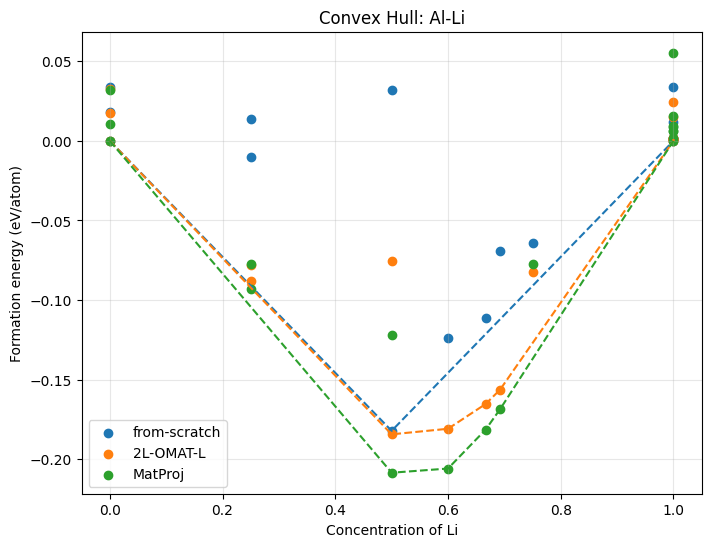

In [25]:
plot_convex_hull({"from-scratch":df, "2L-OMAT-L":df_fm, "MatProj": ref_df})